In [74]:
# impot libraries and datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("import successful")

import successful


In [75]:
tips = sns.load_dataset("tips")

# dislay the dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# .loc[] - Lablel-Based Selection

In [76]:
# Get all records where the meal happened on sunday
sunday_meals = tips.loc[tips['day'] == "Sun"]
sunday_meals

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [79]:
# Get sunday Transactions with only 'total_bill" and "tip" columns
tips.loc[tips['day'] == "Sun", ['total_bill', 'tip', 'day']]

,total_bill,tip,day
0,16.99,1.01,Sun
1,10.34,1.66,Sun
2,21.01,3.50,Sun
3,23.68,3.31,Sun
4,24.59,3.61,Sun
...,...,...,...
186,20.90,3.50,Sun
187,30.46,2.00,Sun
188,18.15,3.50,Sun
189,23.10,4.00,Sun


# .iloc[] - Position-Based Selection

In [81]:
# Select the first 10 rows
first_10_orders = tips.iloc[:10]
first_10_orders

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [82]:
# Get first 10  rows and first 3 columns
subset_data = tips.iloc[:10, :3]
subset_data

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female
5,25.29,4.71,Male
6,8.77,2.00,Male
7,26.88,3.12,Male
8,15.04,1.96,Male
9,14.78,3.23,Male


# query() - SQL-Like Filtering

In [92]:
# Get high spenders in weekends
high_spenders = tips.query("total_bill > 30 and smoker == 'Yes'")
high_spenders

,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
83,32.68,5.00,Male,Yes,Thur,Lunch,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
170,50.81,10.00,Male,Yes,Sat,Dinner,3
173,31.85,3.18,Male,Yes,Sun,Dinner,2
175,32.90,3.11,Male,Yes,Sun,Dinner,2
179,34.63,3.55,Male,Yes,Sun,Dinner,2
180,34.65,3.68,Male,Yes,Sun,Dinner,4
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [96]:
# Get the tips for weekends
high_tippers = tips.query("tip > 6 and day in ['Sat', 'Sun']")
high_tippers

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


# .merge() - Combining DataFrames

In [101]:
discounts = pd.DataFrame({
    "day": ["Sun", "Sat", "Thur", "Fri"],
    "discount": [5, 10, 3, 7]
})

In [110]:
merged_tips = tips.merge(discounts, on="day", how="left")
merged_tips

,total_bill,tip,sex,smoker,day,time,size,discount
0,16.99,1.01,Female,No,Sun,Dinner,2,5
1,10.34,1.66,Male,No,Sun,Dinner,3,5
2,21.01,3.50,Male,No,Sun,Dinner,3,5
3,23.68,3.31,Male,No,Sun,Dinner,2,5
4,24.59,3.61,Female,No,Sun,Dinner,4,5
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,10
240,27.18,2.00,Female,Yes,Sat,Dinner,2,10
241,22.67,2.00,Male,Yes,Sat,Dinner,2,10
242,17.82,1.75,Male,No,Sat,Dinner,2,10


# Heat Maps -> Correlatins

In [114]:
correlation_matrix = tips.corr(numeric_only=True)

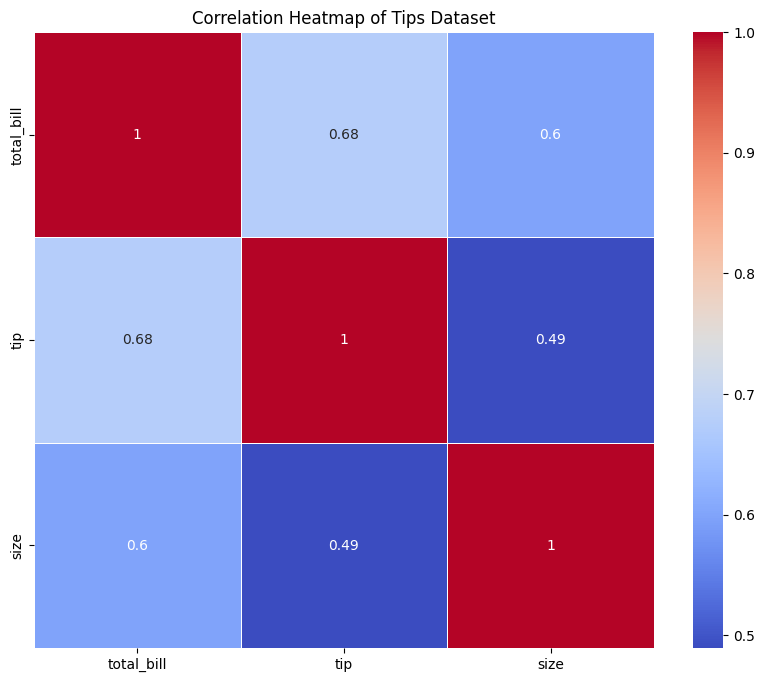

In [119]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Tips Dataset")
plt.show()

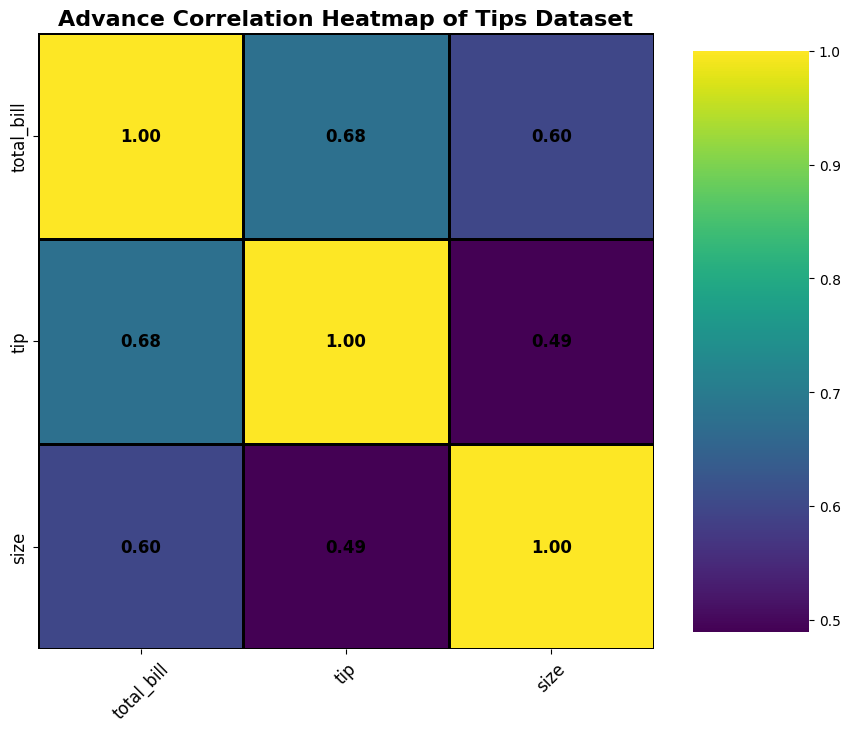

In [127]:
plt.figure(figsize=(10,8))
sns.heatmap(
    correlation_matrix,
    annot=True, # Show correlartion values inside the cells
    fmt=".2f", # Formats value to 2 decimal places
    cmap="viridis", # Change the color scheme ( coolwarm, Blues, Reds, Magma, cividis)
    linewidths=1, # thickness
    linecolor="black",
    cbar=True,
    cbar_kws={"shrink": 3, "aspect":5},
    annot_kws={ "color": "black", "weight": "bold", "size":12},
    square=True, # makes the cells perfect square
    xticklabels=True,
    yticklabels=True
)

plt.title("Advance Correlation Heatmap of Tips Dataset", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, fontsize=12) # Rotates the x-axis labels
plt.yticks(fontsize=12)
plt.show()